# <span style="color:DARKred">PRACA BAZOWA TF3: Tensorflow - REGRESJA LINIOWA [TF3] </span>
# Ćwiczenia na podstawie samouczka GURU99

na podstawie: https://www.guru99.com/linear-regression-for-machine-learning.html

Zmienna	Opis:

    zn	Odsetek gruntów mieszkalnych przeznaczonych pod działki o powierzchni ponad 25 000 stóp kwadratowych
    indus	Odsetek niedetalicznych akrów biznesowych na miasto.
    nox	stężenie tlenków azotu
    rm	średnia liczba pokoi na mieszkanie
    wiek	odsetek jednostek zajmowanych przez właścicieli zbudowanych przed 1940 r
    dis	ważone odległości do pięciu centrów zatrudnienia w Bostonie
    podatek	pełnowartościowa stawka podatku od nieruchomości za 10 000 dolarów
    ptratio	stosunek liczby uczniów do nauczycieli według miasta
    medv	Mediana wartości domów zajmowanych przez właścicieli w tysiącach dolarów

    zaciskanie	wskaźnik przestępczości na mieszkańca według miasta
    chas	Zmienna zmienna Charles River (1 jeśli ogranicza rzekę; 0 w przeciwnym razie)
    b	odsetek czarnych w mieście

In [1]:
import pandas as pd
from sklearn import datasets
import tensorflow as tf
from sklearn.datasets import load_boston
import numpy as np
import seaborn as sns

C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\pyth

ściągam dane - bo ta biblioteka jest zaszyta w sklearn

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


Oddzielnie są składowane nazwy kolumn

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Teraz podstawiamy te nazwy kolumn

In [4]:
df.columns = boston.feature_names
df['PRICE'] = boston.target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


Mapuje kolumnę CHAS

In [5]:
df['CHAS'] = df['CHAS'].map({1:'yes', 0:'no'})
df['CHAS'].head(5)

0    no
1    no
2    no
3    no
4    no
Name: CHAS, dtype: object

Dzielimy zbiór na treningowy i testowy

In [6]:
df_train=df.sample(frac=0.8,random_state=200)
df_test=df.drop(df_train.index)

In [7]:
print(df_train.shape, df_test.shape)

(405, 14) (101, 14)


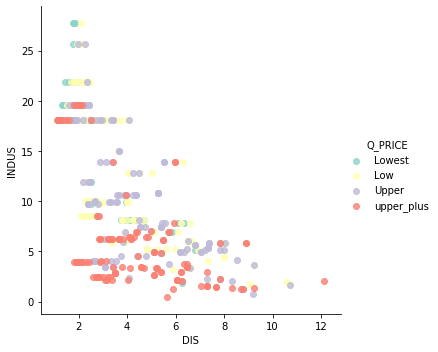

In [8]:
## Check non linearity with important features
df['Q_PRICE'] =  pd.qcut(df['PRICE'], 4, labels=["Lowest", "Low", "Upper", "upper_plus"])
## Show non linearity between RM and LSTAT
ax = sns.lmplot(x="DIS", y="INDUS", hue="Q_PRICE", data=df, fit_reg = False,palette="Set3")

## Preparation data - STANDARYZACJA
Robier funkcję ponieważ to skróci kod

In [9]:
from sklearn import preprocessing

def standardize_data(df): 
    # właściwa standaryzacja - w wyniku dostajemy array
    X_scaled = preprocessing.scale(df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']])
    
    # Ze zeskalowanych danych robimy DataFrame
    X_scaled_df = pd.DataFrame(X_scaled, columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'])
    # dołaczamy kolumny CHAS i PRICE
    df_scale = pd.concat([X_scaled_df,
                       df['CHAS'],
                       df['PRICE']],axis=1, join='inner')
    return df_scale

Możesz użyć tej funkcji do zbudowania skalowanego zestawu TRENINGOWEGO I TESTOWEGO.

In [10]:
df_train_scale = standardize_data(df_train)
df_test_scale = standardize_data(df_test)

W statystyce standaryzacja to proces umieszczania różnych zmiennych w tej samej skali. Ten proces umożliwia porównanie wyników między różnymi typami zmiennych. Zazwyczaj w celu standaryzacji zmiennych oblicza się średnią i odchylenie standardowe dla zmiennej. Następnie dla każdej zaobserwowanej wartości zmiennej odejmuje się średnią i dzieli przez odchylenie standardowe.

In statistics, standardization is the process of putting different variables on the same scale. This process allows you to compare scores between different types of variables. Typically, to standardize variables, you calculate the mean and standard deviation for a variable. Then, for each observed value of the variable, you subtract the mean and divide by the standard deviation. https://statisticsbyjim.com/glossary/standardization/


Dlaczego powinniśmy standaryzować zmienne?
1. ujednolicenie zmiennych może ujawnić istotne ustalenia, których w innym przypadku byś nie zauważył!
2.

### Multicollinearity

<span style="color:Blue">Collinearity</span> is a linear association between two explanatory variables.

<span style="color:Blue">Multicollinearity</span> refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related.

Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.
https://en.wikipedia.org/wiki/Multicollinearity

The presence of multicollinearity doesn't affect the efficiency of extrapolating the fitted model to new data provided that the predictor variables follow the same pattern of multicollinearity in the new data as in the data on which the regression model is based.



### STANDARYZACJA - Co robi ta funkcja?

sklearn.preprocessing - Standaryzuj zestaw danych wzdłauż dowolnej osi

Zwykle standaryzacja odnosi się do procesu odejmowania średniej i dzielenia przez odchylenie standardowe.

In [11]:
X_scaled = preprocessing.scale(df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']])
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [12]:
X_scaled_df = pd.DataFrame(X_scaled, columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])
X_scaled_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [13]:
X_scaled_df.mean().astype(int)


CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int32

In [14]:
X_scaled_df.std()

CRIM       1.00099
ZN         1.00099
INDUS      1.00099
NOX        1.00099
RM         1.00099
AGE        1.00099
DIS        1.00099
RAD        1.00099
TAX        1.00099
PTRATIO    1.00099
B          1.00099
LSTAT      1.00099
dtype: float64

Dane są zestandaryzowane średnia 0 i odchylenie standardowe 1

Wymieniam, które zmienne są ciągłe i jedna zmienna kategoryczna. 
### Krok 3. Przekształcam te zmienne na zmiennt TensorFlow.

In [15]:
CONTI_FEATURES  = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
CATE_FEATURES = ['CHAS']

In [16]:
continuous_features = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES]

categorical_features = [tf.feature_column.categorical_column_with_vocabulary_list('CHAS', ['yes','no'])]

In [17]:
continuous_features

[_NumericColumn(key='CRIM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='ZN', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='INDUS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='NOX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='RM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='AGE', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='DIS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='RAD', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='TAX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PTRATIO', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn

In [18]:
categorical_features

[_VocabularyListCategoricalColumn(key='CHAS', vocabulary_list=('yes', 'no'), dtype=tf.string, default_value=-1, num_oov_buckets=0)]

### krok 4. Tworze estymator Regresji liniowej Tensorflow
katalog: train_Boston

In [19]:
model = tf.estimator.LinearRegressor(    
    model_dir="train_Boston",     
    feature_columns=categorical_features + continuous_features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'train_Boston', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D3428176D8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Na razie model nic nie zrobił.

 ### krok 4. Teraz przekształacamy komórki w tensory TensorFlow
 
 
 ### Definiowanie jak karmić model
 Trudna część z TensorFlow to sposób na karmienie modelu. Tensorflow został zaprojektowany do pracy z obliczeniami równoległymi i bardzo dużym zestawem danych. Z powodu ograniczenia zasobów maszyny nie jest możliwe zasilenie modelu wszystkimi danymi jednocześnie. W tym celu musisz za każdym razem podać dużą porcję danych. Zauważ, że mówimy o ogromnym zestawie danych z milionami lub więcej rekordów. Jeśli nie dodasz partii (batch), wystąpi błąd pamięci.

Na przykład, jeśli twoje dane zawierają 100) obserwacji i zdefiniujesz wielkość partii (batch size) na 10, oznacza to, że model zobaczy 10 obserwacji dla każdej (iteration) iteracji (10 * 10).

Gdy model zobaczy wszystkie dane, kończy jedną epokę (epoch). Epoka określa, ile razy model ma widzieć dane. Lepiej jest ustawić ten krok na none i pozwolić modelowi wykonać iterację liczbę razy.

Drugą informacją do dodania jest to, czy chcesz przetasować dane przed każdą iteracją (iteration). Podczas szkolenia ważne jest tasowanie danych, aby model nie nauczył się określonego wzorca zestawu danych. Jeśli model pozna szczegóły podstawowego wzorca danych, będzie miał trudności z uogólnieniem prognozy dla niewidocznych danych. Nazywa się to nadmiernym dopasowaniem (overfitting). Model działa dobrze na danych treningowych, ale nie może poprawnie przewidzieć dla niewidocznych danych.

TensorFlow sprawia, że te dwa kroki są łatwe do zrobienia. Gdy dane trafiają do potoku (pipeline), wie, ile obserwacji potrzebuje (partia- batch) i czy musi je tasować (shuffle).

Aby poinstruować Tensorflow, jak karmić model, możesz użyć pandas_input_fn. Ten obiekt potrzebuje 5 parametrów:

x: dane funkcji
y: dane etykiety
batch_size: partia. Domyślnie 128
num_epoch: domyślnie liczba epok 1
Shuffle: Losuj lub nie dane. Domyślnie Brak

Musisz karmić model wiele razy, aby zdefiniować funkcję powtarzania tego procesu. cała ta funkcja get_input_fn.

In [20]:
FEATURES = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'CHAS']
LABEL= 'PRICE'

def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),
       y = pd.Series(data_set[LABEL].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

## Trenowanie modelu

In [21]:
model.train(input_fn=get_input_fn(df_train_scale, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from train_Boston\model.ckpt-5000
INFO:tensorflow:Saving checkpoints for 5001 into train_Boston\model.ckpt.
INFO:tensorflow:loss = 4394.5273, step = 5001
INFO:tensorflow:global_step/sec: 267.038
INFO:tensorflow:loss = 15689.098, step = 5101 (0.377 sec)
INFO:tensorflow:global_step/sec: 308.748
INFO:tensorflow:loss = 9877.889, step = 5201 (0.324 sec)
INFO:tensorflow:global_step/sec: 307.338
INFO:tensorflow:loss = 9766.83, step = 5301 (0.325 sec)
INFO:tensorflow:global_step/sec: 298.686
INFO:tensorflow:loss = 12885.824, step = 5401 (0.334 sec)
INFO:tensorflow:global_step/sec: 305.938
INFO:tensorflow:loss = 7560.785, step = 5501 (0.327 sec)
INFO:tensorflow:global_step/sec: 300.466
INFO:tensorflow:loss = 16011.377, step = 5601 (0.333 sec)
INFO:tensorflow:global_step/sec: 301.816
INFO:tensorflow:loss = 10546.868, step = 5701 (0.331 sec)
INFO:tensorflow:global_step/sec: 309.212
INFO:tensorflow:loss = 6920.983, st

## krok 7. Szacowanie wydajności modelu na zestawie testowym zestandaryzowanym

In [22]:
model.evaluate(input_fn=get_input_fn(df_test_scale, 
                                      num_epochs=1,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Starting evaluation at 2019-12-11-19:20:39
INFO:tensorflow:Restoring parameters from train_Boston\model.ckpt-6000
INFO:tensorflow:Finished evaluation at 2019-12-11-19:20:40
INFO:tensorflow:Saving dict for global step 6000: average_loss = 37.2367, global_step = 6000, loss = 707.49725


{'average_loss': 37.2367, 'loss': 707.49725, 'global_step': 6000}

## Obliczanie R2 dla modelu Regresji liniowej Tensorflow
Robię predykcję dla zestawu tesowego

In [23]:
y = model.predict(    
         input_fn=get_input_fn(df_test,                          
         num_epochs=1,                          
         n_batch = 256,                          
         shuffle=False))

In [24]:
import itertools

predictions = list(p["predictions"] for p in itertools.islice(y, 1871))
#print("Predictions: {}".format(str(predictions)))

INFO:tensorflow:Restoring parameters from train_Boston\model.ckpt-6000


In [25]:
# predictions

Model dał nam ciąg wyników y. Przetwarzam teraz ten ciąg wyników na listę.

In [26]:
import numpy as np

conc = np.vstack(predictions)
# conc

In [27]:
ZHP = pd.DataFrame(conc)
ZHP.rename(columns={0:'y_pred'}, inplace=True)

kot = ZHP['y_pred'].values
kot = kot.astype('float32')
kot.dtype

dtype('float32')

In [28]:
# kot

In [29]:
y = df_test['PRICE'].values
y = y.astype('float32')
y.dtype

dtype('float32')

Teraz tworzę ramkę danych ze zmiennymi rzeczywistymi i przewidywanymi dla y.

In [30]:
PZU = pd.DataFrame({'y': y, 'y_pred': kot })
PZU.dtypes

y         float32
y_pred    float32
dtype: object

https://stackoverflow.com/questions/42351184/how-to-calculate-r2-in-tensorflow

In [31]:
def R_squared(y, y_pred):
    
  residual = tf.reduce_sum(tf.square(tf.subtract(y,y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.div(residual, total))
  return r2

https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

Aby użyć tej funkcji, obie zmienne muszą mieć ten sam typ danych.

In [32]:
y.dtype

dtype('float32')

In [33]:
kot.dtype

dtype('float32')

In [34]:
residual = tf.reduce_sum(tf.square(tf.subtract(y,kot)))

In [35]:
total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))

In [36]:
r2 = tf.subtract(1.0, tf.div(residual, total))
r2

<tf.Tensor 'Sub_2:0' shape=() dtype=float32>

Uruchmiam sesje TensorFlow dla r2

In [37]:
sess = tf.Session()
a = sess.run(r2)
print('R Square parameter: ',a)

R Square parameter:  -371.77762


Utrata modelu to 1651. Jest to miara do pokonania w następnej sekcji
## Krok 8. Ulepszanie modelu przez tworzenie zmiennych syntetycznych
mamy silne związki korelacji pomiędzy niektórymi zmiennymi niezależnymi. Te związki występują parami. Poniższa funkcja tworzono jest po to aby utworzyć w zbiorze zmiennych treningowych i zmiennych testowych kolumny ze zmiennymi syntetycznymi 


In [38]:
def interaction_term(var_1, var_2, name):
    t_train = df_train_scale[var_1]*df_train_scale[var_2]
    train = t_train.rename(name)
    t_test = df_test_scale[var_1]*df_test_scale[var_2]
    test = t_test.rename(name)
    return train, test

Za pomocą funkcji tworzymy nowe kolumny syntetyczne

In [39]:
TwoIN_train, TwoIN_test= interaction_term('INDUS', 'NOX', 'TwoIN')

In [40]:
print(TwoIN_train.shape, TwoIN_test.shape)

(325,) (19,)


In [41]:
TwoIN_train.head(4)

2    0.075608
4    1.582601
5    0.680999
8    0.323489
Name: TwoIN, dtype: float64

Wcześniej była funkcja do podwójnej interakcji.
Teraz robimy funkcję do potrójnych interakcji.

In [42]:
def triple_interaction_term(var_1, var_2,var_3, name):
    t_train = df_train_scale[var_1]*df_train_scale[var_2]*df_train_scale[var_3]
    train = t_train.rename(name)
    t_test = df_test_scale[var_1]*df_test_scale[var_2]*df_test_scale[var_3]
    test = t_test.rename(name)
    return train, test

In [43]:
ThreeIN_train, ThreeIN_test= triple_interaction_term('INDUS', 'NOX', 'DIS','ThreeIN')

Teraz tworzymy nową dataFrame ze zmiennych zestandaryzowanych oraz zmiennych syntetycznych.

In [44]:
df_train_new = pd.concat([df_train_scale,
                          TwoIN_train,
                          ThreeIN_train],
                         axis=1, join='inner')
df_test_new = pd.concat([df_test_scale,
                         TwoIN_test,
                         ThreeIN_test],
                         axis=1, join='inner')
df_train_new.head(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,PRICE,TwoIN,ThreeIN
2,-0.278174,-0.47701,-0.464046,-0.162933,-0.188265,0.812916,0.105941,-0.661477,-0.616881,1.147718,0.444455,0.803221,no,34.7,0.075608,0.008010
4,1.014608,-0.47701,0.992729,1.594192,-0.595967,0.987593,-0.907724,1.636106,1.502932,0.776192,-1.278797,1.504488,no,36.2,1.582601,-1.436565
5,-0.409562,-0.47701,-1.155868,-0.589166,1.036257,0.620414,-0.164461,-0.891235,-0.835358,-0.338387,0.444455,-1.025327,no,28.7,0.680999,-0.111997
8,-0.370330,-0.47701,-0.747795,-0.432591,-0.157121,0.798656,-0.346465,-0.201960,-0.616881,-0.524150,0.426162,1.182209,no,16.5,0.323489,-0.112078
9,1.828346,-0.47701,0.992729,1.246247,-2.699598,0.795092,-1.129861,1.636106,1.502932,0.776192,-0.779497,2.450575,no,18.9,1.237185,-1.397847


## Krok 8: Odnowa model teraz ze zmiennymi systetycznymi

In [45]:
CONTI_FEATURES_NEW  = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT',
                       'TwoIN', 'ThreeIN']
### ciągle ten sam mechaizm jest nowy katalog
continuous_features_new = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES_NEW]
model = tf.estimator.LinearRegressor(
    model_dir="train_Boston_1", 
    feature_columns= categorical_features + continuous_features_new)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'train_Boston_1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D345398048>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
FEATURES = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'TwoIN', 'ThreeIN','CHAS']
LABEL= 'PRICE'
def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),
       y = pd.Series(data_set[LABEL].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [47]:
model.train(input_fn=get_input_fn(df_train_new, 
                                      num_epochs=None,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from train_Boston_1\model.ckpt-5000
INFO:tensorflow:Saving checkpoints for 5001 into train_Boston_1\model.ckpt.
INFO:tensorflow:loss = 5000.8623, step = 5001
INFO:tensorflow:global_step/sec: 252.648
INFO:tensorflow:loss = 16727.855, step = 5101 (0.399 sec)
INFO:tensorflow:global_step/sec: 291.769
INFO:tensorflow:loss = 10596.656, step = 5201 (0.343 sec)
INFO:tensorflow:global_step/sec: 294.757
INFO:tensorflow:loss = 9706.863, step = 5301 (0.339 sec)
INFO:tensorflow:global_step/sec: 296.927
INFO:tensorflow:loss = 14228.927, step = 5401 (0.337 sec)
INFO:tensorflow:global_step/sec: 286.383
INFO:tensorflow:loss = 8271.289, step = 5501 (0.350 sec)
INFO:tensorflow:global_step/sec: 294.756
INFO:tensorflow:loss = 16709.549, step = 5601 (0.339 sec)
INFO:tensorflow:global_step/sec: 293.043
INFO:tensorflow:loss = 11188.109, step = 5701 (0.341 sec)
INFO:tensorflow:global_step/sec: 294.326
INFO:tensorflow:loss = 6759.6

### Teraz sprawdzenie na zbiorze testowym

In [48]:
model.evaluate(input_fn=get_input_fn(df_test_new, 
                                      num_epochs=1,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Starting evaluation at 2019-12-11-19:20:46
INFO:tensorflow:Restoring parameters from train_Boston_1\model.ckpt-6000
INFO:tensorflow:Finished evaluation at 2019-12-11-19:20:46
INFO:tensorflow:Saving dict for global step 6000: average_loss = 51.858578, global_step = 6000, loss = 985.313


{'average_loss': 51.858578, 'loss': 985.313, 'global_step': 6000}

Nowa strata to 1515. Wystarczy dodać dwie nowe zmienne, by zmniejszyć stratę. Oznacza to, że możesz dokonać lepszej prognozy niż w modelu porównawczym.

https://www.guru99.com/linear-regression-for-machine-learning.html